# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [84]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [85]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [86]:
#Type your code here
file_path = '/content/drive/MyDrive/Dicoding_DataScience/Submission_ML/customer_segmentation.csv'
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [87]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84


In [88]:
df.shape

(2240, 29)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Terdapat 29 kolom dengan terbagi atas:**

**1. Jenis Data**
  **Categorial**: Education, Marital_Status, Kidhome, Teenhome, Complain, Response, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5
  **Numerical**: Id, Income, Recency, MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitMonth, Z_CostContact, Z_Revenue,
  **Datetime**: Year_Birth, Dt_Customer


**2. Kelompok Data**
**Kategori Produk**: MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds
**Purchasement Sources**: NumWebPurchases, NumCatalogPurchases, NumStorePurchases
**Promotions**: NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response
**People**: Education, Marital_Status, Kidhome, Teenhome, Recency, Year_Birth, Dt_Customer
**Others**: Complain, Z_CostContact, Z_Revenue


### 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [90]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


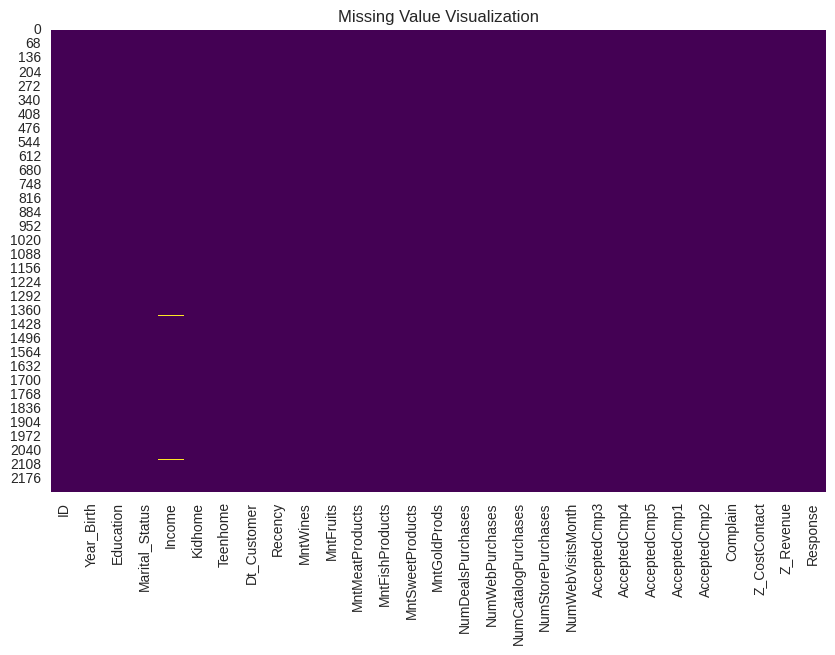

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Visualization')
plt.show()

### 3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [92]:
df['Year_Birth'] = pd.to_datetime(df["Year_Birth"],format="%Y").dt.year

In [93]:
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"],format="%d-%m-%Y")

In [94]:
# Membuat satu atribut menampung umur customer
df['Age'] = 2024 - df['Year_Birth']

In [95]:
# Membuat satu atribut menampung data pengeluaran customer
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [96]:
# Membuat satu atribut untuk menampung informasi kehidupan customer
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Divorced':'Alone', 'Single':'Alone', 'Widow':'Alone', 'Alone':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

In [97]:
# Membuat satu atribut menampung informasi anak customer
df['Children'] = df['Kidhome'] + df['Teenhome']

In [98]:
# Membuat satu atribut menampung informasi jumlah anggota keluarga customer
df['Total_Family'] = df['Children'] + df['Living_With'].replace({'Partner':2, 'Alone':1})

<ipython-input-98-4f7e5057e56b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Family'] = df['Children'] + df['Living_With'].replace({'Partner':2, 'Alone':1})


In [99]:
# Membuat satu atribut untuk menampung informasi apakah customer seorang Parent
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

In [100]:
# Memperbaiki nama atribut agar mudah dibaca
df = df.rename(columns={
    'MntWines': 'Wine',
    'MntFruits': 'Fruit',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntMeatProducts': 'Meat',
    'MntGoldProds': 'Gold',
    'NumDealsPurchases': 'Promotions',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitMonth': 'Web_Visits'
})

In [101]:
# Membuat satu atribut untuk menampung total purchasement
df['Total_Purchases'] = df['Promotions'] + df['Web_Purchases'] + df['Catalog_Purchases'] + df['Store_Purchases']

In [102]:
# Membuat satu atribut untuk menampung total campaign
df['Total_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [103]:
# Drop Unnecessary Column
df.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Response', 'ID', 'Complain', 'Kidhome', 'Teenhome'], axis=1, inplace=True)

In [104]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Dt_Customer,2012-09-04 00:00:00,2014-03-08 00:00:00,2013-08-21 00:00:00,2014-02-10 00:00:00,2014-01-19 00:00:00,2013-09-09 00:00:00,2012-11-13 00:00:00,2013-05-08 00:00:00,2013-06-06 00:00:00,2014-03-13 00:00:00,...,2013-03-16 00:00:00,2012-08-21 00:00:00,2012-08-17 00:00:00,2013-06-02 00:00:00,2013-07-01 00:00:00,2013-06-13 00:00:00,2014-06-10 00:00:00,2014-01-25 00:00:00,2014-01-24 00:00:00,2012-10-15 00:00:00
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
Wine,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
Fruit,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3
Meat,546,6,127,20,118,98,164,56,24,6,...,26,143,6,18,7,182,30,217,214,61
Fish,172,2,111,10,46,0,50,3,3,1,...,7,13,3,8,6,42,0,32,80,2
Sweet,88,1,21,3,27,42,49,1,3,1,...,1,10,4,1,2,118,0,12,30,1


In [105]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
Wine,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
Fruit,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
Meat,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
Fish,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979
Sweet,2240.0,27.062946,0.0,1.0,8.0,33.0,263.0,41.280498
Gold,2240.0,44.021875,0.0,9.0,24.0,56.0,362.0,52.167439
Promotions,2240.0,2.325,0.0,1.0,2.0,3.0,15.0,1.932238


Dari kode diatas didapatkan insight:
1. Customer berentang pada usia 28 hingga 131
2. Pengeluaran yang dilakukan customer berentang pada 4 hingga 1798 yang menunjukkan kebiasaan umum di supermarket
3. Anggota Keluarga customer berentang antara 1 hingga 5 dengan kondisi ada anak maupun tidak dengan jumlah anak di keluarga umumnya 3 sampai 5 anggota.
4. Recency atau pembelian terakhir customer ada pada rentang 0 sampai dengan 99 hari, yang menunjukkan adanya intensitas yang tinggi terhadap behaviour customer dalam kedatangannya berbelanja kembali.

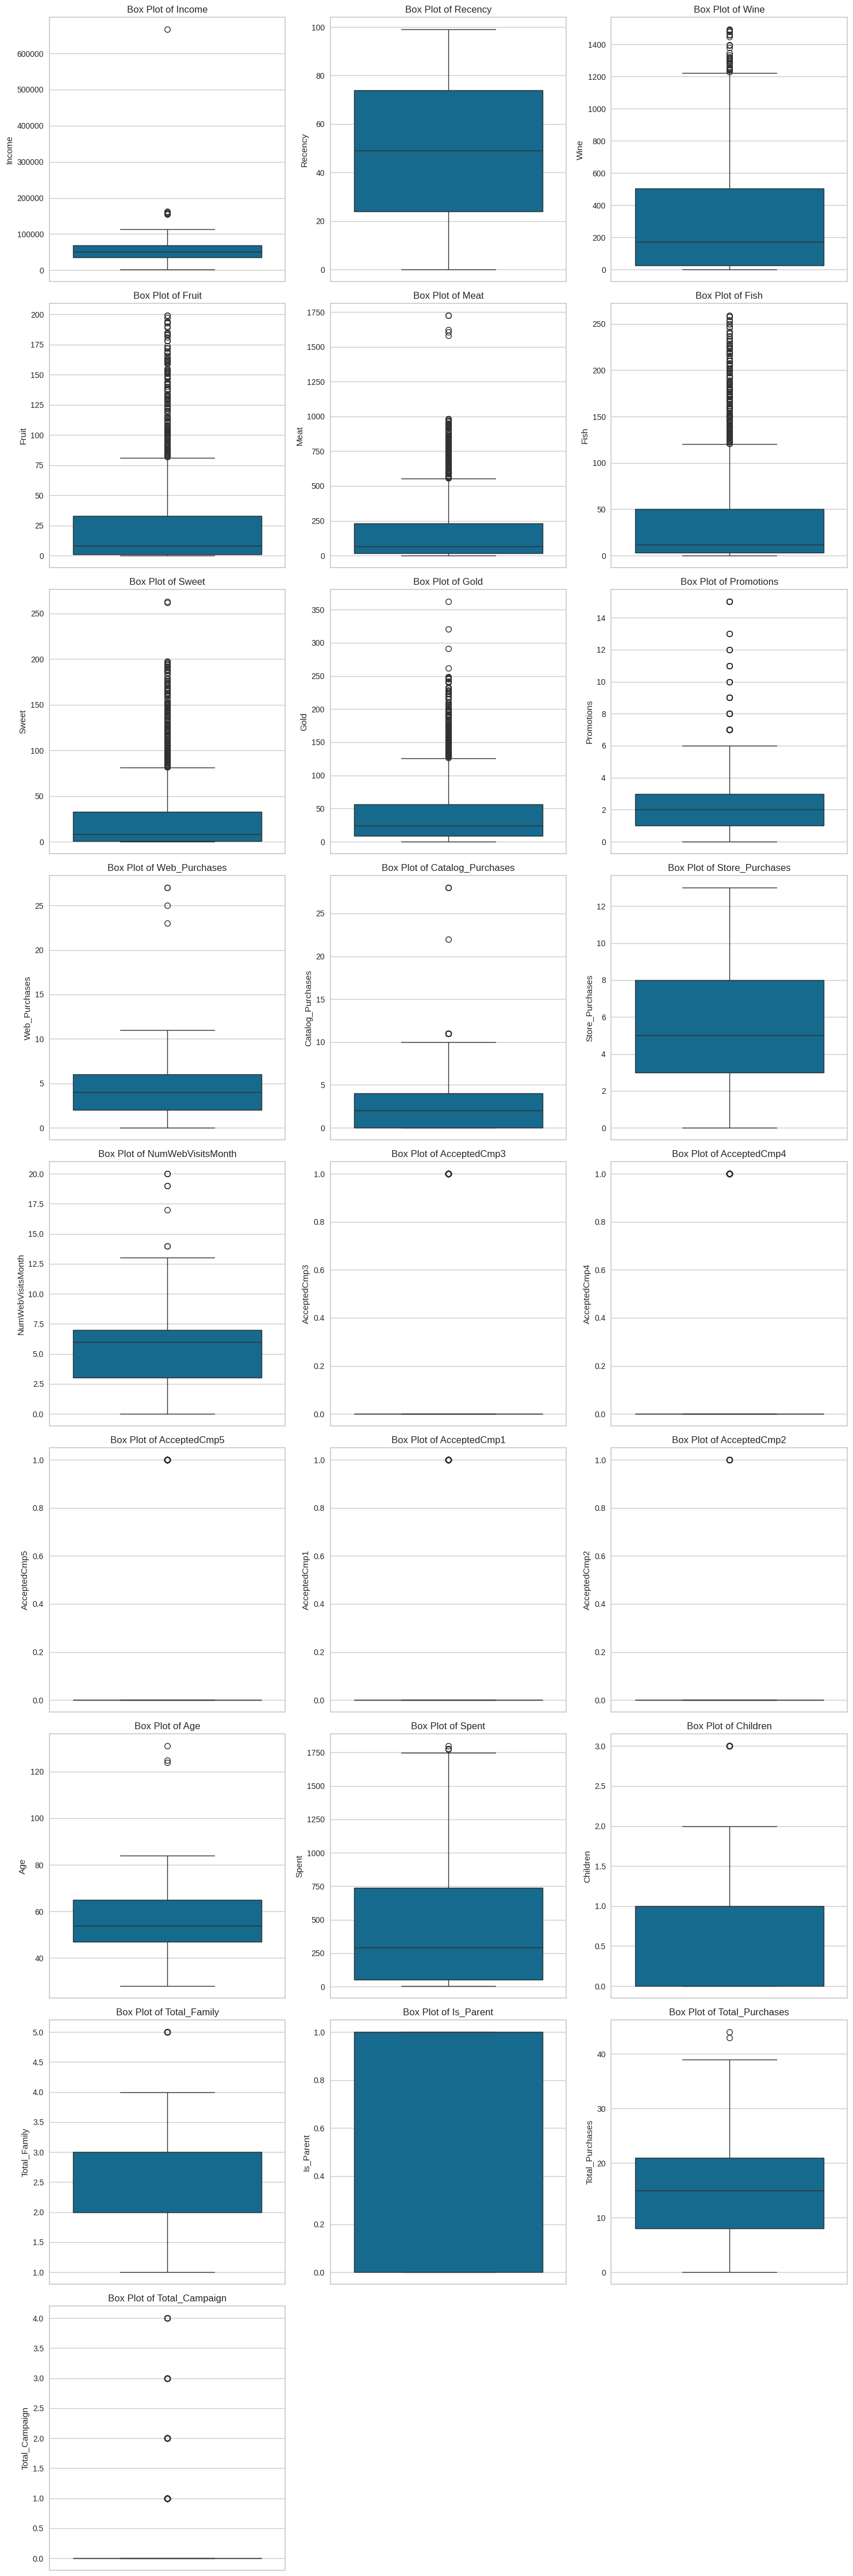

In [106]:
numerical_features = df.select_dtypes(include=np.number).columns
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Dari plot tersebut terdapat outlier yang lumayan tinggi pada setiap atribut data. Namun yang menjadi perhatian adalah income dan age

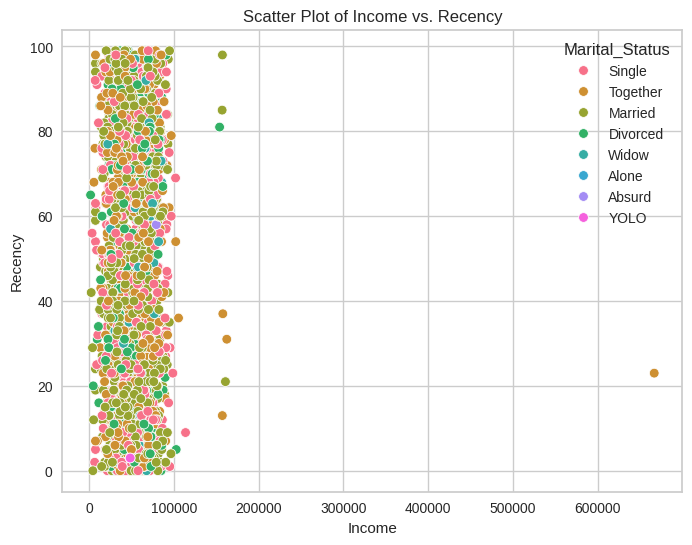

In [107]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Recency', hue='Marital_Status', data=df)
plt.title('Scatter Plot of Income vs. Recency')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

Dari plot ini terdapat 1 outlier yang signifikan menunjukkan income yang terlalu tinggi dari 1 customer. Maka dari itu dapat dilakukan preprocessing nanti untuk menangani outlier. Sehingga hasil clustering yang didapat tidak terlalu liar.

Insight:
1. Customer dengan income dibawah 100.000 adalah customer yang setia untuk melakukan repeat order. Hal tersebut dapat menjadi target marketing yang disesuaikan kembali dengan jumlah anggota keluarga di rumahnya.
2. Beberapa customer dengan income 100.000 hingga 200.000 tergambarkan sedikit dan jarang melakukan repeat order dalam waktu dekat namun dapat dipertimbangkan kembali apakah customer tersebut melakukan order dalam jumlah besar pada satu waktu? Dapat dilihat dari visualisasi income dengan total_purchases
3. Untuk customer dengan income > 200.000 melakukan repeat order dalam waktu yang dekat terlihat dari nilai recencynya namun hal tersebut tidak signifikan dalam clustering.

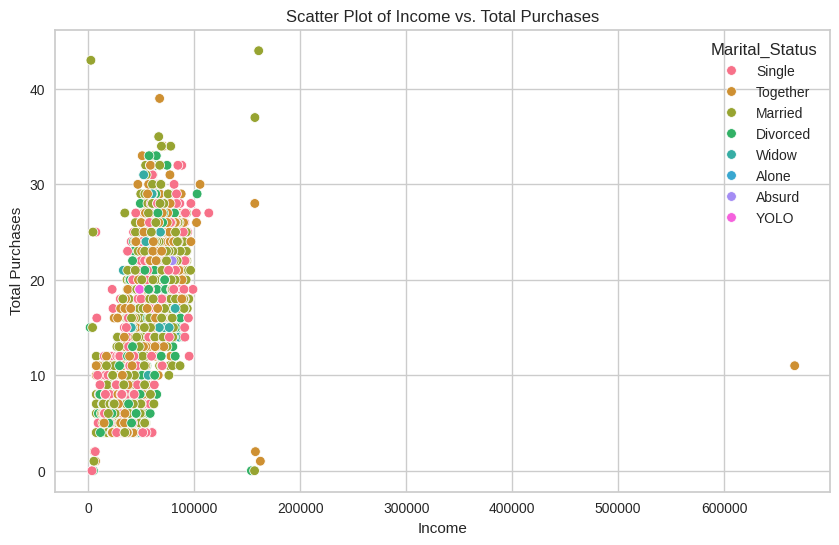

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Purchases', hue='Marital_Status', data=df)
plt.title('Scatter Plot of Income vs. Total Purchases')
plt.xlabel('Income')
plt.ylabel('Total Purchases')
plt.show()

Insight:
1. Dari sini dapat dilihat bahwa customer dengan income dibawah 100.000 melakukan pembelian dalam jumlah yang banyak untuk sekali order.
2. Customer dengan pendapatan > 100.000 melakukan pembelian dalam jumlah banyak dan sedikit untuk satu waktu.
3. Insight di scatter sebelumnya terbukti bahwa customer yang memiliki income tinggi melakukan pembelian dalam jumlah banyak pada satu waktu namun tetap juga ada yang membeli dalam jumlah sedikit

### 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

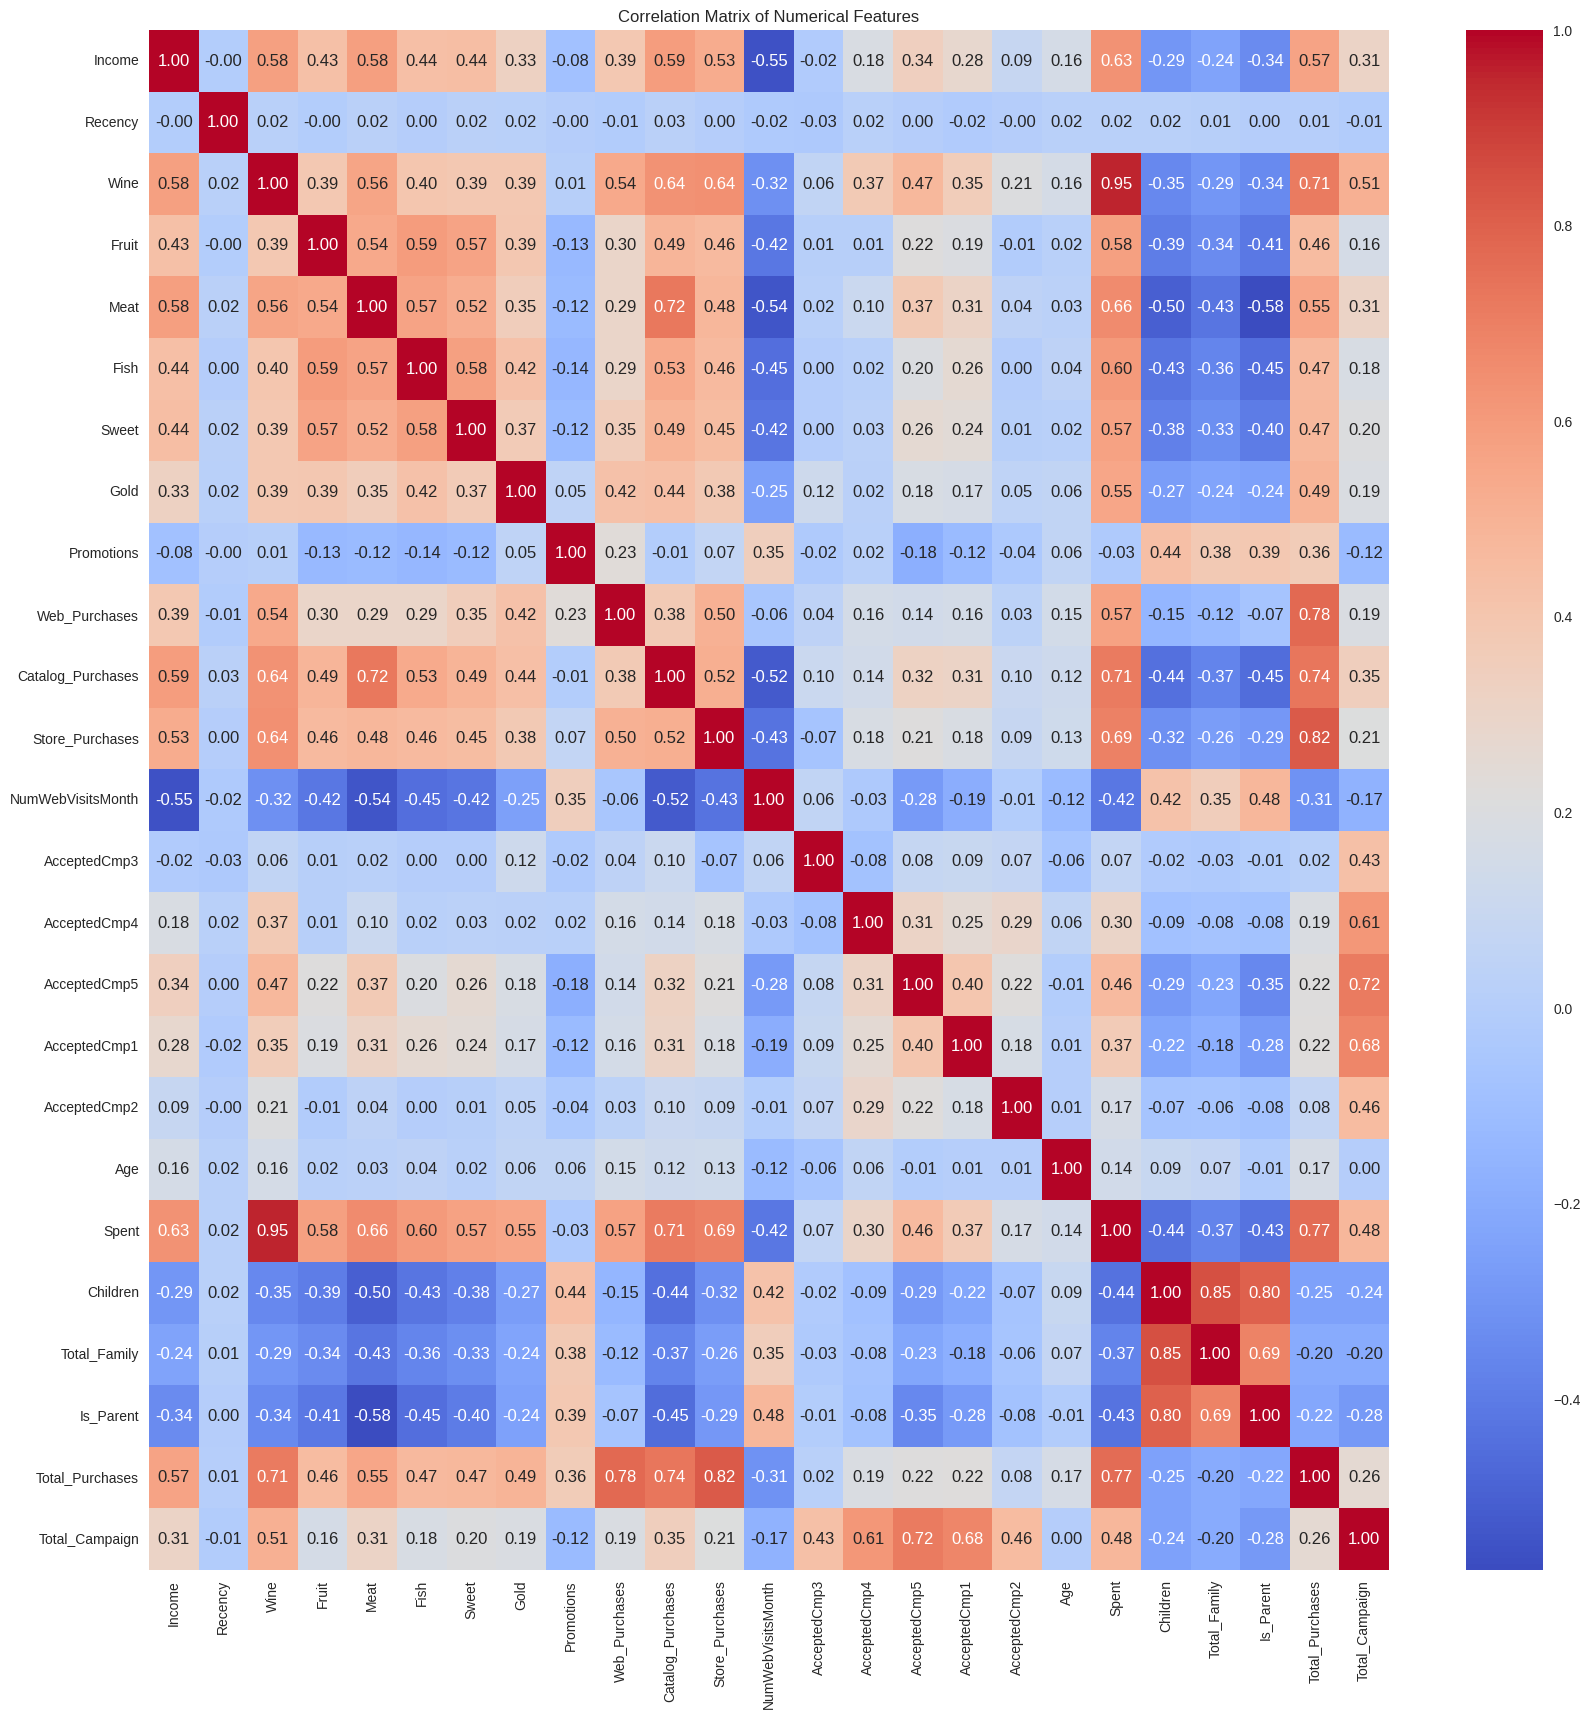

In [109]:
#Type your code here
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Dari distribusi heatmap tersebut dapat dilihat bahwa data tidak berkorelasi kearah yang positif saja.
Hal tersebut menunjukkan adanya variasi yang dihasilkan dari banyaknya makna data.
Sebagai insight:
1. Produk yang dibeli berkorelasi positif begitupun juga campaign dan sumber pembelian produk juga.
2. Beberapa data yang berkolerasi positif dapat dijadikan pertimbangan Feature Selection
3. Data yang dilakukan dropping karena tidak signifikan korelasinya: Promotions, Web_Purchases, Store_Purchases, Catalog_Purchases, NumWebVisitMonth, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Is_Parent, Total_Family

In [110]:
print("Total categories in Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in Education:\n", df["Education"].value_counts())

Total categories in Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


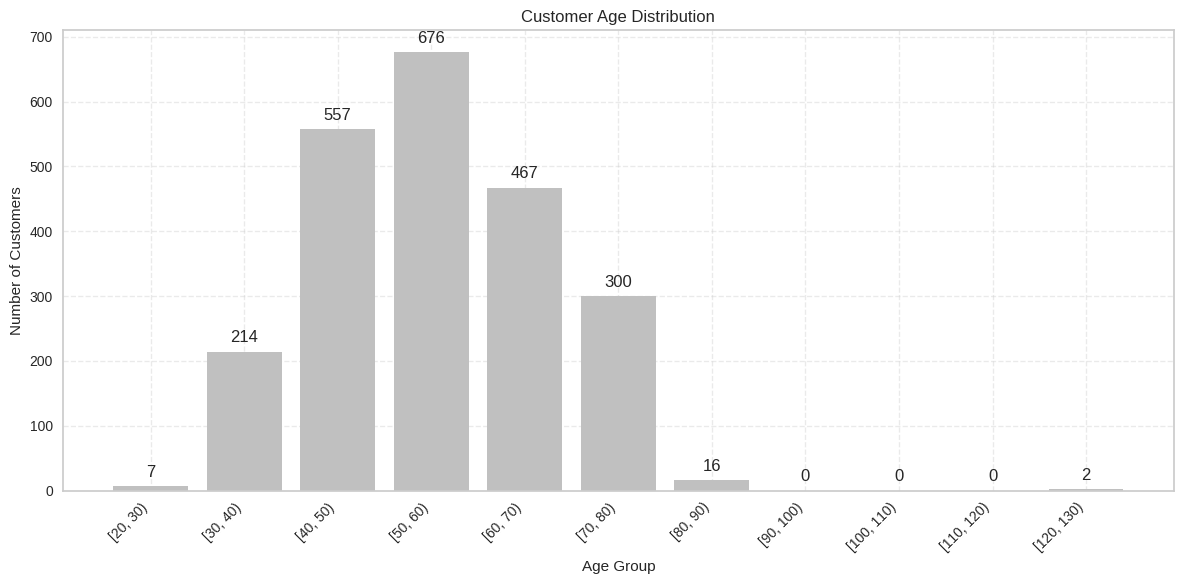

In [111]:
# Bagi Age menjadi tiap 10 tahun dan dimulai dari min age, yaitu 28
df['Age_Group'] = pd.cut(df['Age'], bins=range(20, 135, 10), right=False)

# Sorting Age
age_counts = df['Age_Group'].value_counts().sort_index()

# Bar Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(age_counts.index.astype(str), age_counts.values, color='silver')

# Menambahkan label diatas bar
for bar, count in zip(bars, age_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.xlabel('Age Group')
plt.grid(True, linestyle='--', alpha=0.4)
plt.ylabel('Number of Customers')
plt.title('Customer Age Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight:
1. Distribusi umur
  
  - 20-30: 7 customer
  - 30-40: 214 customer
  - 40-50: 557 customer
  - 50-60: 676 customer
  - 60-70: 467 customer
  - 70-80: 300 customer
  - 80-90: 16 customer
  - 120-130: 2 customer

2. Potensi
  - Terdapat 2 outlier di umur 100 keatas yang dapat dihilangkan pada preprocessing karena tidak signifikan mempengaruhi hasil clustering dan targeting terhadap customer tersebut juga tidak begitu signifikan
  - Customer paling banyak ada pada rentang usia produktif 30-50 dan usia lansia 50-80. Hal tersebut dapat menjadi prioritas utama marketing agar lebih membuka campaign produknya kepada segment customer tersebut.


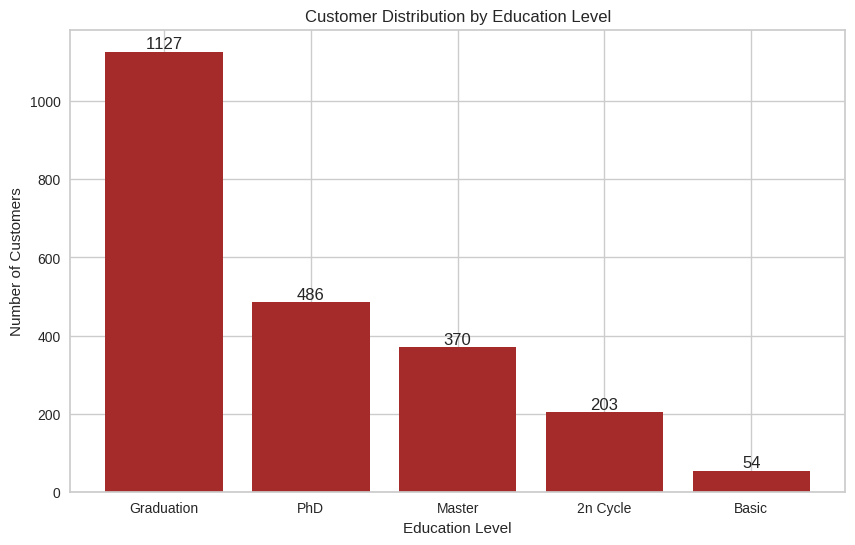

In [112]:
education_counts = df['Education'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(education_counts.index, education_counts.values, color='brown')

# Add counts above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Education Level')
plt.show()

Insight:
1. Pada 5 jenjang education di dataset ini terdapat persentase yang sangat dominan pada graduate yang menunjukkan bahwa customer mayoritas orang terpelajar dan bisa dilakukan campaign untuk beberapa produk kesehatan dan investasi seperti gold.
2. Untuk customer yang memiliki gelar PhD dan Master dapat ditargetkan pemasaran produk kesehatan seperti Fruits, Fish dan Gold.
3. Untuk customer dengan tanpa gelar dapat dipasarkan produk sweets.


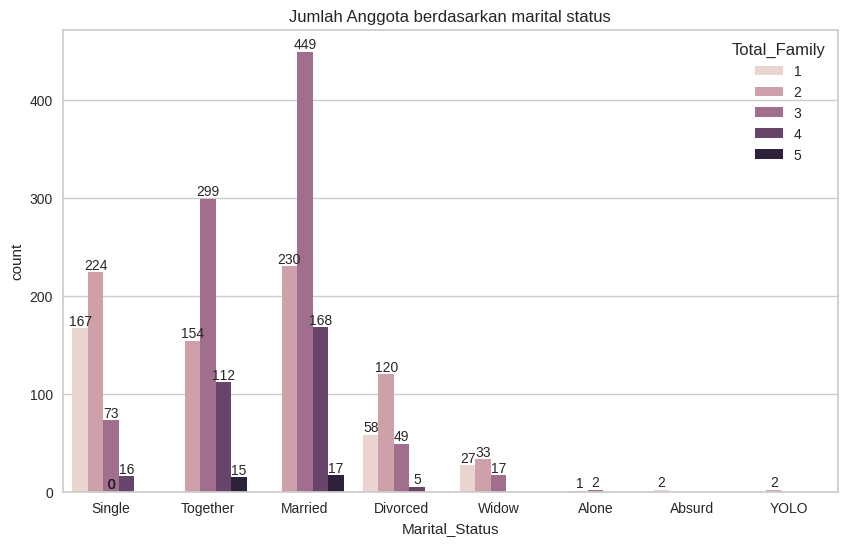

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Total_Family', data=df)
plt.title('Jumlah Anggota berdasarkan marital status')

# Add count above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                   ha='center', va='bottom', fontsize=10)

plt.show()

Insight:
1. Dominasi terdapat pada customer dengan kategori tinggal bersama keluarga baik itu together maupun married.
2. Ketika seorang dikatakan single ternyata ini mengindikasikan tinggal bersama keluarga besar seperti ayah ibu dan sodara kandung.
3. Untuk kategori alone memberikan cerminan bahwa customer tinggal sebatang kara.
4. Kategori customer yolo dan absurd tidak memberikan dampak signifikan sehingga nanti data ini bisa disederhanakan saja menjadi 2 kategori (tinggal dengan partner dan tinggal sendiri)
5. Customer yang tinggal bersama orang lain adalah potensi marketing terbesar didataset ini

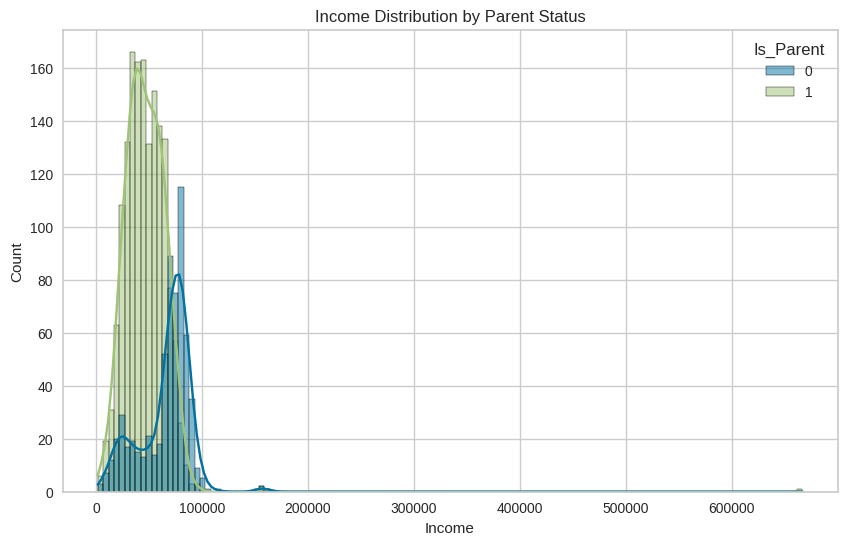

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Income', hue='Is_Parent', data=df, kde=True)
plt.title('Income Distribution by Parent Status')
plt.xlabel('Income')
plt.show()

Insight:
1. Customer dengan kondisi memiliki tanggungan anak memiliki pendapatan yang berada dibawah 100.000. Sedangkan Customer yang tinggal tanpa tanggunan anak memiliki pendapatan lebih besar namun jumlahnya tidak sebanyak jumlah customer parent.
2. Jika customer termasuk parent maka distribusinya ada ditengah sedangkan jika customer tidak memiliki tanggunan atau bukan parent maka distribusi incomenya left skewed. Hal tersebut menunjukkan jumlah customer yang tidak ada tanggungan sedikit persentase jumlahnya di dataset ini. Sehingga customer tanpa tanggungan dengan income besar tinggi tampak lebih tinggi.
3. Customer dengan kategori memiliki tanggungan (anak) dapat menjadi target market untuk produk yang disesuaikan dengan kebutuhan keluarga.

<ipython-input-115-031bfb928c86>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Sum_spend, y=Campaigns, palette='viridis')


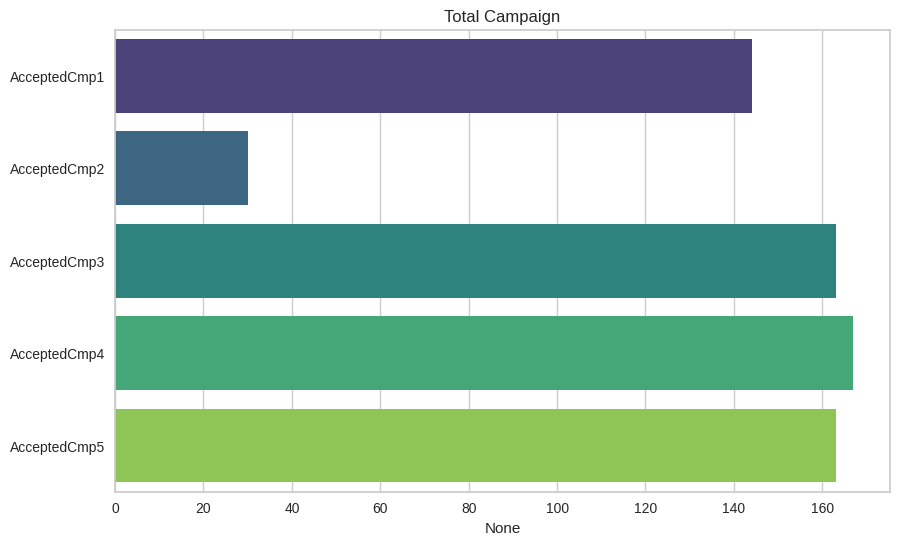

In [115]:
Campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
Sum_spend = df[Campaigns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=Sum_spend, y=Campaigns, palette='viridis')
plt.title('Total Campaign')
plt.show()

Insight:
1. Dapat dilihat disini bahwa campaign yang dilakukan mengalami penurunan pada campaign kedua. Sedangkan campaign di sektor lain tereksekusi dengan baik.
2. Dari sini dapat ditinjau kembali sebenarnya apa yang mempengaruhi campaign tersebut.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

**1. Menghapus atau Menangani Data Kosong (Missing Values)**

In [116]:
df_new = df.copy()

In [117]:
List_Drop = [
    'Promotions','Web_Purchases', 'Store_Purchases','Catalog_Purchases', 'NumWebVisitsMonth',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Is_Parent',
    'Total_Family', 'Dt_Customer', 'Age_Group']
df_new.drop(List_Drop, axis=1, inplace=True)

In [118]:
#Type your code here
df_new.isnull().sum()

,0
Education,0
Marital_Status,0
Income,24
Recency,0
Wine,0
Fruit,0
Meat,0
Fish,0
Sweet,0
Gold,0


In [119]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2240 non-null   object 
 1   Marital_Status   2240 non-null   object 
 2   Income           2216 non-null   float64
 3   Recency          2240 non-null   int64  
 4   Wine             2240 non-null   int64  
 5   Fruit            2240 non-null   int64  
 6   Meat             2240 non-null   int64  
 7   Fish             2240 non-null   int64  
 8   Sweet            2240 non-null   int64  
 9   Gold             2240 non-null   int64  
 10  Age              2240 non-null   int32  
 11  Spent            2240 non-null   int64  
 12  Living_With      2240 non-null   object 
 13  Children         2240 non-null   int64  
 14  Total_Purchases  2240 non-null   int64  
 15  Total_Campaign   2240 non-null   int64  
dtypes: float64(1), int32(1), int64(11), object(3)
memory usage: 

In [120]:
median_income = df_new['Income'].median()
print(f"The median income is: {median_income}")

The median income is: 51381.5


In [121]:
df_new.fillna({'Income':median_income}, inplace=True)

Education          0
Marital_Status     0
Income             0
Recency            0
Wine               0
Fruit              0
Meat               0
Fish               0
Sweet              0
Gold               0
Age                0
Spent              0
Living_With        0
Children           0
Total_Purchases    0
Total_Campaign     0
dtype: int64


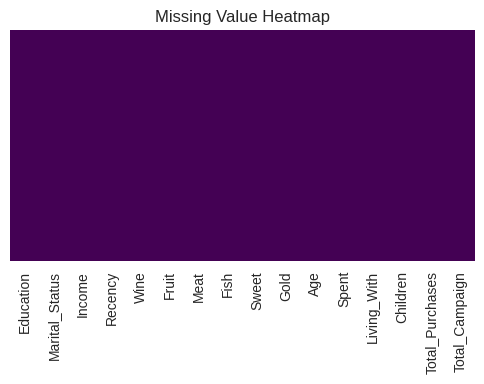

In [122]:
missing_values = df_new.isnull().sum()
print(missing_values)
plt.figure(figsize=(6, 3))
sns.heatmap(df_new.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

**2. Menghapus Data Duplikat**

In [123]:
df_new.duplicated().sum()

201

In [124]:
duplicate_rows = df_new[df_new.duplicated(keep=False)]
duplicate_rows

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Age,Spent,Living_With,Children,Total_Purchases,Total_Campaign
8,PhD,Together,30351.0,19,14,0,24,3,3,2,50,22,Partner,1,6,0
15,PhD,Single,82800.0,23,1006,22,115,59,68,45,78,1200,Alone,0,26,2
17,Graduation,Together,37760.0,20,84,5,38,150,12,28,78,279,Partner,0,13,0
23,PhD,Married,65324.0,0,384,0,102,21,32,5,70,442,Partner,1,20,0
24,Graduation,Together,40689.0,69,270,3,27,39,6,99,73,417,Partner,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Graduation,Together,22775.0,40,5,1,8,0,0,1,46,7,Partner,1,4,0
2221,Master,Single,75777.0,12,712,26,538,69,13,80,42,900,Alone,0,21,2
2225,Graduation,Together,58554.0,55,368,24,68,38,0,88,56,518,Partner,2,22,0
2234,Graduation,Married,34421.0,81,3,3,7,6,2,9,50,23,Partner,1,4,0


Insight:
1. Data yang duplikat disebabkan oleh kolom education dan marital yang masih berbentuk kategorial. Setelah dilakukan Normalisasi pasti lebih baik

**4. Deteksi dan Penanganan Outlier**

In [125]:
print(df_new.nlargest(10, 'Age'))

     Education Marital_Status   Income  Recency  Wine  Fruit  Meat  Fish  \
239   2n Cycle         Single  60182.0       23     8      0     5     7   
339        PhD       Together  83532.0       36   755    144   562   104   
192   2n Cycle       Divorced  36640.0       99    15      6     8     7   
1950       PhD         Single  51141.0       96   144      0     7     0   
424        PhD        Married  93027.0       77  1285     42   716    55   
39         PhD       Divorced  48948.0       53   437      8   206   160   
358     Master        Married  65073.0       65   629     17   177    69   
415        PhD        Married  75865.0       73   483      0   591   156   
894        PhD       Divorced  48948.0       53   437      8   206   160   
1150       PhD          Widow  57513.0       59   735     40   183    52   

      Sweet  Gold  Age  Spent Living_With  Children  Total_Purchases  \
239       0     2  131     17       Alone         1                4   
339      64   224  

Terdapat outlier pada age untuk ID: 239, 339, 192 karena sangat tidak wajar ketika customer masih aktif di umur tersebut. Lagi pula data tersebut mempengaruhi kualitas kluster nantinya.

In [126]:
print(df_new.nlargest(10, 'Income'))

       Education Marital_Status    Income  Recency  Wine  Fruit  Meat  Fish  \
2233  Graduation       Together  666666.0       23     9     14    18     8   
617          PhD       Together  162397.0       31    85      1    16     2   
687          PhD        Married  160803.0       21    55     16  1622    17   
1300      Master       Together  157733.0       37    39      1     9     2   
164          PhD        Married  157243.0       98    20      2  1582     1   
1653  Graduation       Together  157146.0       13     1      0  1725     2   
2132         PhD        Married  156924.0       85     2      1     2     1   
655   Graduation       Divorced  153924.0       81     1      1     1     1   
1898         PhD         Single  113734.0        9     6      2     3     1   
646   Graduation       Together  105471.0       36  1009    181   104   202   

      Sweet  Gold  Age  Spent Living_With  Children  Total_Purchases  \
2233      1    12   47     44     Partner         1       

Untuk data Income terdapat outlier dengan income 666666,0 pada ID 2233 yang tidak wajar

Lakukan Penghapusan outlier

In [127]:
df_new.drop(index = [2233, 192, 239, 339], inplace=True)

In [128]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2236.0,51952.614043,21411.466851,1730.0,35502.5,51381.5,68275.75,162397.0
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
Wine,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
Fruit,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
Meat,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
Fish,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
Sweet,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0
Gold,2236.0,43.983005,52.061568,0.0,9.0,24.0,56.00,362.0
Age,2236.0,55.101968,11.703281,28.0,47.0,54.0,65.00,84.0
Spent,2236.0,439.003131,429.257763,4.0,52.0,294.0,738.25,1798.0


Seluruh data yang terindikasi ada outlier telah dibuang.
Income dan Age telah berada pada range yang wajar.

**5. Encoding Data Kategorikal**

In [129]:
categorical_cols = ['Education', 'Marital_Status', 'Living_With']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

In [130]:
df_new

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Age,Spent,Living_With,Children,Total_Purchases,Total_Campaign
0,2,4,58138.0,58,635,88,546,172,88,88,67,1071,0,0,25,0
1,2,4,46344.0,38,11,1,6,2,1,6,70,21,0,2,6,0
2,2,5,71613.0,26,426,49,127,111,21,42,59,649,1,0,21,0
3,2,5,26646.0,26,11,4,20,10,3,5,40,33,1,1,8,0
4,4,3,58293.0,94,173,43,118,46,27,15,43,304,1,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,46,709,43,182,42,118,247,57,1159,1,1,18,0
2236,4,5,64014.0,56,406,0,30,0,0,8,78,414,1,3,22,1
2237,2,2,56981.0,91,908,48,217,32,12,24,43,1024,0,0,19,1
2238,3,5,69245.0,8,428,30,214,80,30,61,68,629,1,1,23,0


**3. Normalisasi atau Standarisasi Fitur**

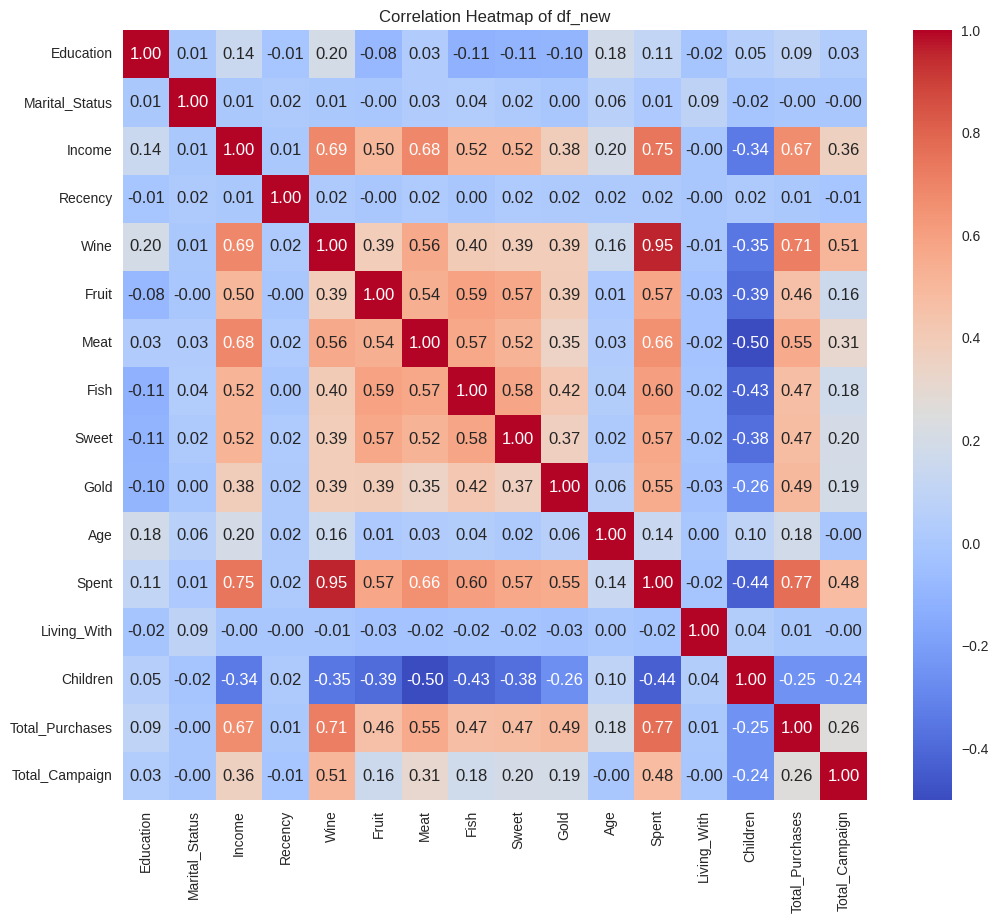

In [131]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of df_new')
plt.show()

In [132]:
scaler = MinMaxScaler()

numerical_cols = df_new.select_dtypes(include=np.number).columns

df_processed = df_new.copy()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

df_processed

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Age,Spent,Living_With,Children,Total_Purchases,Total_Campaign
0,0.50,0.571429,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.696429,0.594760,0.0,0.000000,0.568182,0.00
1,0.50,0.571429,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.750000,0.009476,0.0,0.666667,0.136364,0.00
2,0.50,0.714286,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.553571,0.359532,1.0,0.000000,0.477273,0.00
3,0.50,0.714286,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.214286,0.016165,1.0,0.333333,0.181818,0.00
4,1.00,0.428571,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.267857,0.167224,1.0,0.333333,0.431818,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.50,0.428571,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.517857,0.643813,1.0,0.333333,0.409091,0.00
2236,1.00,0.714286,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.892857,0.228540,1.0,1.000000,0.500000,0.25
2237,0.50,0.285714,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.267857,0.568562,0.0,0.000000,0.431818,0.25
2238,0.75,0.714286,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.714286,0.348384,1.0,0.333333,0.522727,0.00


**6. Binning (Pengelompokan Data)**

Tidak dilakukan karena tidak signifikan pengaruhnya untuk dataset ini

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [51]:
#Type your code here
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_processed)
    inertia.append(kmeans.inertia_)
    label = kmeans.labels_

df_processed['Cluster'] = label

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

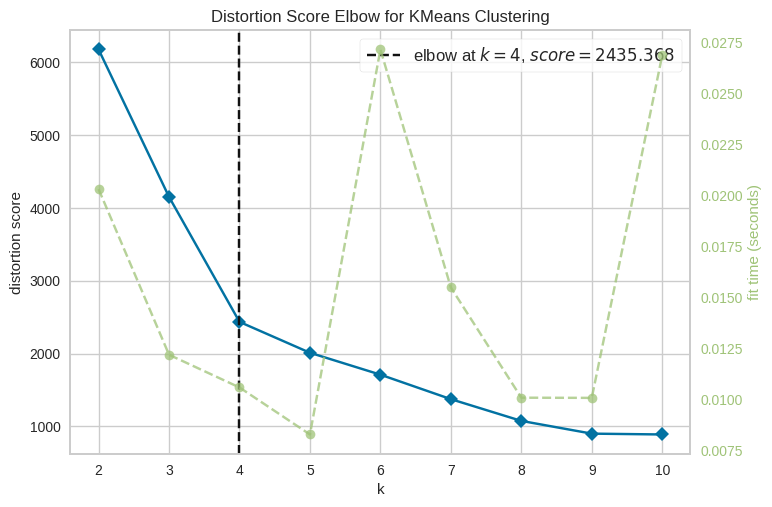

Optimal K value: 4


In [52]:
#Type your code here
kmeans = KMeans(random_state=0)

k_range = range(2, 11)
visualizer = KElbowVisualizer(kmeans, k=k_range)
visualizer.fit(df_processed)
visualizer.show()

optimal_k = visualizer.elbow_value_

print(f"Optimal K value: {optimal_k}")

Silhouette Score for K=2: 0.6153886710672607
Silhouette Score for K=3: 0.4991862424742069
Silhouette Score for K=4: 0.48030470337641834
Silhouette Score for K=5: 0.45447083573145813
Silhouette Score for K=6: 0.44163110330635513
Silhouette Score for K=7: 0.4786089190030119
Silhouette Score for K=8: 0.4926267228285417
Silhouette Score for K=9: 0.500097791805482
Silhouette Score for K=10: 0.4673310405863195


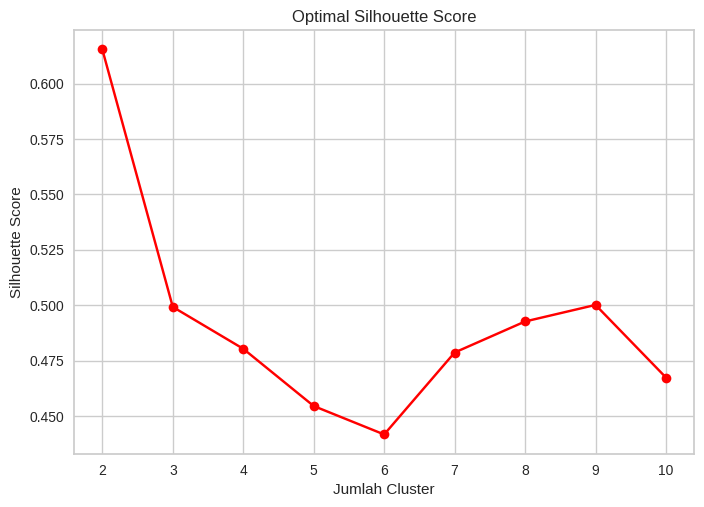

In [53]:
#Type your code here
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
    labels = kmeans.fit_predict(df_processed)
    silhouette_avg = silhouette_score(df_processed, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")

plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Optimal Silhouette Score')
plt.show()

Silhouette Score for K=2: 0.5983183640093319
Silhouette Score for K=3: 0.5438992709507395
Silhouette Score for K=4: 0.5242125460073813
Silhouette Score for K=5: 0.5181983093883186
Silhouette Score for K=6: 0.5409029625034847
Silhouette Score for K=7: 0.516415772083818
Silhouette Score for K=8: 0.5182370050236338
Silhouette Score for K=9: 0.5187999056651396
Silhouette Score for K=10: 0.5204430187296643


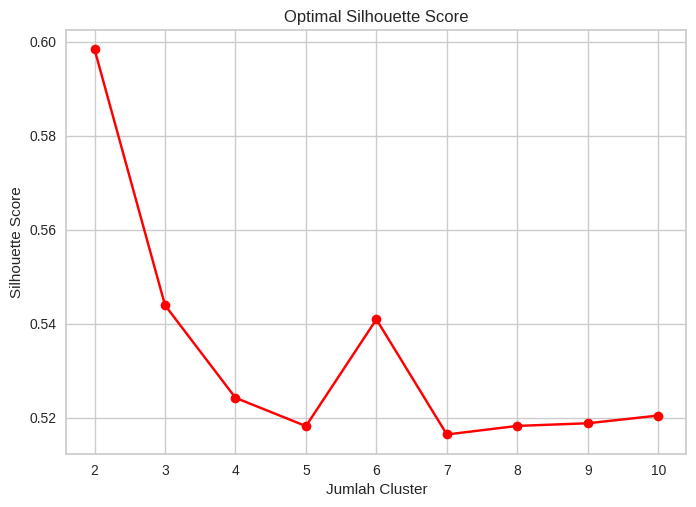

In [54]:
#Type your code here
silhouette_scores_df_new = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
    labels = kmeans.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, labels)
    silhouette_scores_df_new.append(silhouette_avg)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")

plt.plot(range(2, 11), silhouette_scores_df_new, marker='o', color='red')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Optimal Silhouette Score')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
df_processed['Cluster'] = kmeans.fit_predict(df_processed)

In [56]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
df_new['Cluster'] = kmeans.fit_predict(df_processed)

## **c. Feature Selection (Opsional)**


Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **1. KBest**

In [57]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

X = df_processed.drop(columns=['Cluster'])

y = df_processed['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
filter_selector = SelectKBest(score_func=chi2, k=6)
X_train_filtered = filter_selector.fit_transform(X, y)
X_test_filter = filter_selector.transform(X_test)
selected_feature_indices = filter_selector.get_support(indices=True)
selected_features = list(X.columns[selected_feature_indices])

print("Fitur yang dipilih dengan Filter Methods:", selected_features)

Fitur yang dipilih dengan Filter Methods: ['Recency', 'Wine', 'Spent', 'Living_With', 'Total_Purchases', 'Total_Campaign']


In [59]:
df_selected_kb = df_processed[selected_features]
df_selected_kb

,Recency,Wine,Spent,Living_With,Total_Purchases,Total_Campaign
0,0.585859,0.425318,0.594760,0.0,0.568182,0.00
1,0.383838,0.007368,0.009476,0.0,0.136364,0.00
2,0.262626,0.285332,0.359532,1.0,0.477273,0.00
3,0.262626,0.007368,0.016165,1.0,0.181818,0.00
4,0.949495,0.115874,0.167224,1.0,0.431818,0.00
...,...,...,...,...,...,...
2235,0.464646,0.474883,0.643813,1.0,0.409091,0.00
2236,0.565657,0.271936,0.228540,1.0,0.500000,0.25
2237,0.919192,0.608171,0.568562,0.0,0.431818,0.25
2238,0.080808,0.286671,0.348384,1.0,0.522727,0.00


Silhouette Score for K=2: 0.47724874604741724
Silhouette Score for K=3: 0.39543569325691724
Silhouette Score for K=4: 0.3538419102410274
Silhouette Score for K=5: 0.3752403153005366
Silhouette Score for K=6: 0.38181722534667134
Silhouette Score for K=7: 0.37113515285477744
Silhouette Score for K=8: 0.3643889373006743
Silhouette Score for K=9: 0.3547679207559268
Silhouette Score for K=10: 0.35849997195271005


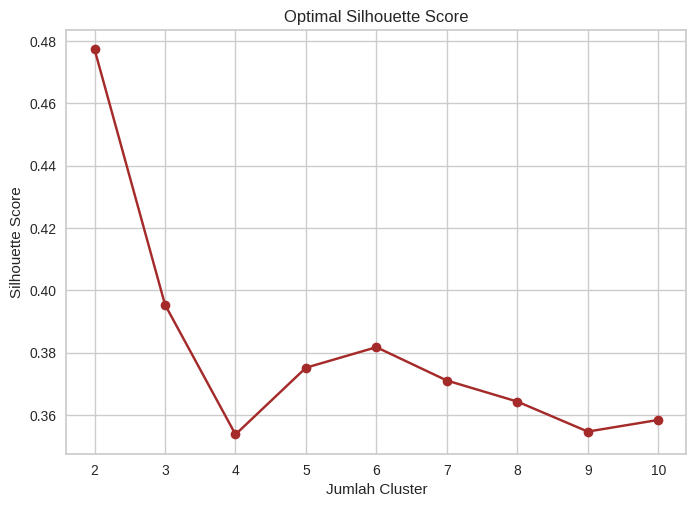

In [60]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
    labels = kmeans.fit_predict(df_selected_kb)
    silhouette_avg = silhouette_score(df_selected_kb, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")

plt.plot(range(2, 11), silhouette_scores, marker='o', color='brown')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Optimal Silhouette Score')
plt.show()

Jumlah Feature yang optimal menurut Kbest adalah terdiri dari Wine, Fruit, Fish, Sweet, Spent, Living_With yang mana itu tidak akan merepresentasikan data secara utuh

In [61]:
#Type your code here
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++')
labels = kmeans.fit_predict(df_selected_kb)
df_selected_kb['Cluster'] = kmeans.labels_
df_selected_kb

<ipython-input-61-b8fa1d9a89d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_kb['Cluster'] = kmeans.labels_


,Recency,Wine,Spent,Living_With,Total_Purchases,Total_Campaign,Cluster
0,0.585859,0.425318,0.594760,0.0,0.568182,0.00,0
1,0.383838,0.007368,0.009476,0.0,0.136364,0.00,0
2,0.262626,0.285332,0.359532,1.0,0.477273,0.00,2
3,0.262626,0.007368,0.016165,1.0,0.181818,0.00,1
4,0.949495,0.115874,0.167224,1.0,0.431818,0.00,1
...,...,...,...,...,...,...,...
2235,0.464646,0.474883,0.643813,1.0,0.409091,0.00,2
2236,0.565657,0.271936,0.228540,1.0,0.500000,0.25,2
2237,0.919192,0.608171,0.568562,0.0,0.431818,0.25,0
2238,0.080808,0.286671,0.348384,1.0,0.522727,0.00,2


### **2. PCA**

In [62]:
df_processed

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Age,Spent,Living_With,Children,Total_Purchases,Total_Campaign,Cluster
0,0.50,0.571429,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.696429,0.594760,0.0,0.000000,0.568182,0.00,0
1,0.50,0.571429,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.750000,0.009476,0.0,0.666667,0.136364,0.00,0
2,0.50,0.714286,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.553571,0.359532,1.0,0.000000,0.477273,0.00,1
3,0.50,0.714286,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.214286,0.016165,1.0,0.333333,0.181818,0.00,1
4,1.00,0.428571,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.267857,0.167224,1.0,0.333333,0.431818,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.50,0.428571,0.370288,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.517857,0.643813,1.0,0.333333,0.409091,0.00,0
2236,1.00,0.714286,0.387659,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.892857,0.228540,1.0,1.000000,0.500000,0.25,1
2237,0.50,0.285714,0.343885,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.267857,0.568562,0.0,0.000000,0.431818,0.25,0
2238,0.75,0.714286,0.420217,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.714286,0.348384,1.0,0.333333,0.522727,0.00,1


Original number of features: 16
Reduced number of features: 2
Silhouette Score for K=2 (PCA): 0.5639144584416511
Silhouette Score for K=3 (PCA): 0.6145429373567944
Silhouette Score for K=4 (PCA): 0.6804858204237838
Silhouette Score for K=5 (PCA): 0.646117984248425
Silhouette Score for K=6 (PCA): 0.6370176450332284
Silhouette Score for K=7 (PCA): 0.6176118387017194
Silhouette Score for K=8 (PCA): 0.612037842246934
Silhouette Score for K=9 (PCA): 0.6085012759072594
Silhouette Score for K=10 (PCA): 0.5979900689702501


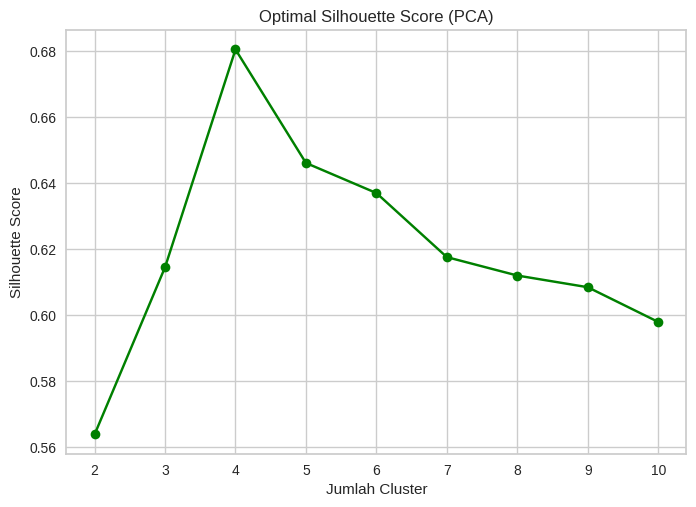

In [63]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(df_processed.drop(columns=['Cluster']))

print("Original number of features:", df_processed.shape[1] -1)
print("Reduced number of features:", X_pca.shape[1])
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

silhouette_scores_pca = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores_pca.append(silhouette_avg)
    print(f"Silhouette Score for K={k} (PCA): {silhouette_avg}")

plt.plot(range(2, 11), silhouette_scores_pca, marker='o', color='green')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Optimal Silhouette Score (PCA)')
plt.show()

Terlihat PCA mereduksi komponen dengan baik sehingga metode PCA digunakan sebagai feature engineering dengan target kluster 4

In [64]:
kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++')
df_new['Cluster'] = kmeans.fit_predict(X_pca)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

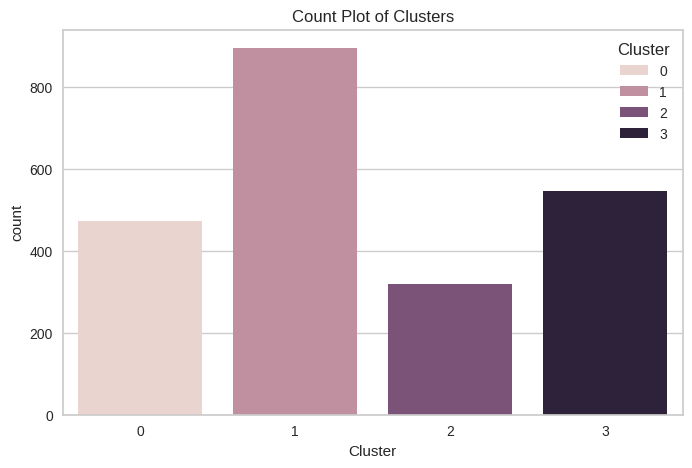

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_new, hue='Cluster')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.show()

**A. Visualisasi 2D PCA**

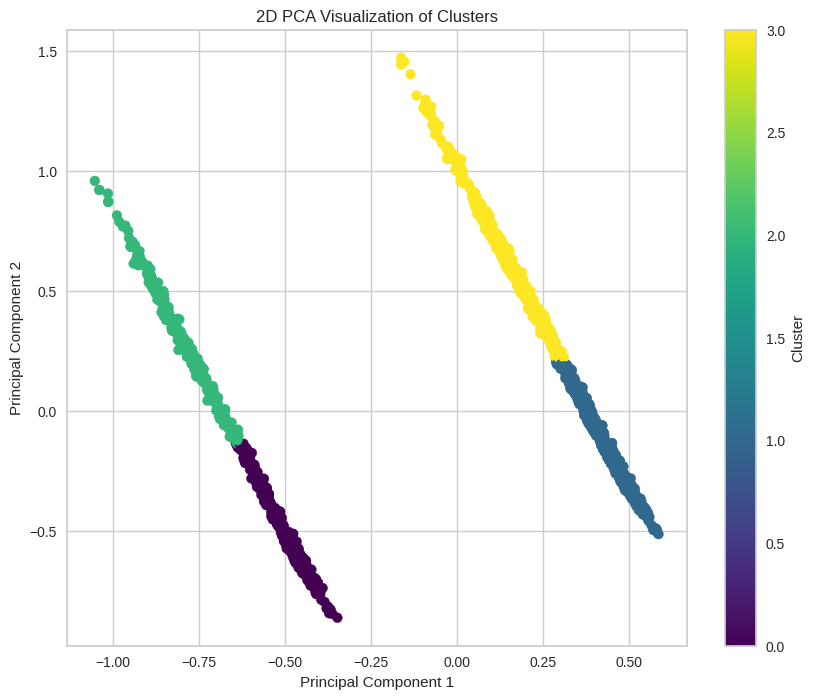

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_new['Cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

Insight:

Distribusi Cluster tidak begitu baik karena tumpang tindih hal ini menunjukkan kualitas dataset yang memang tidak begitu baik dari awal.

**B. Visualisasi Hasil Cluster terhadap Spent dan Total Pengeluaran Customer**

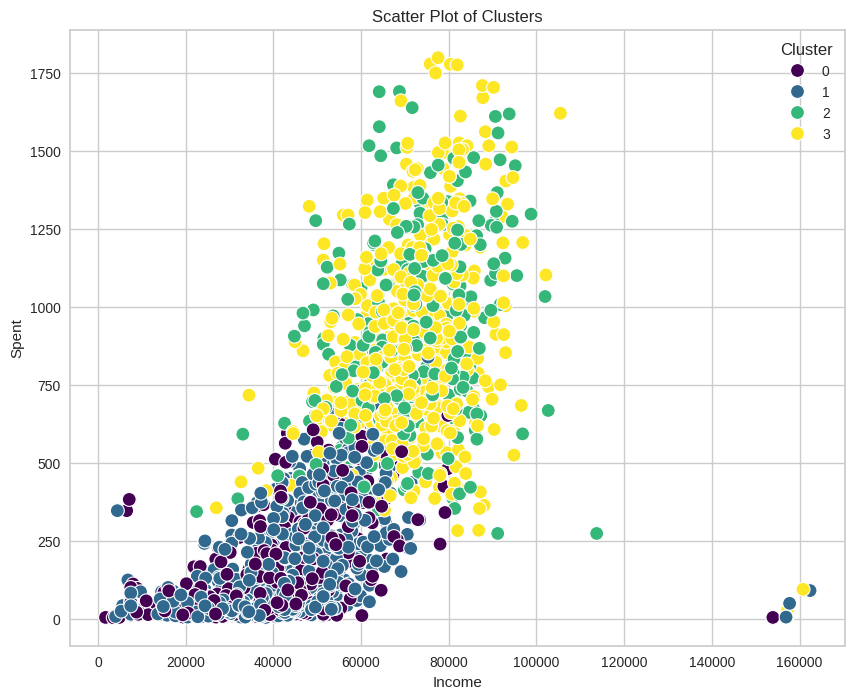

In [67]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Spent', hue='Cluster', data=df_new, palette='viridis', s=100)
plt.title('Scatter Plot of Clusters')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

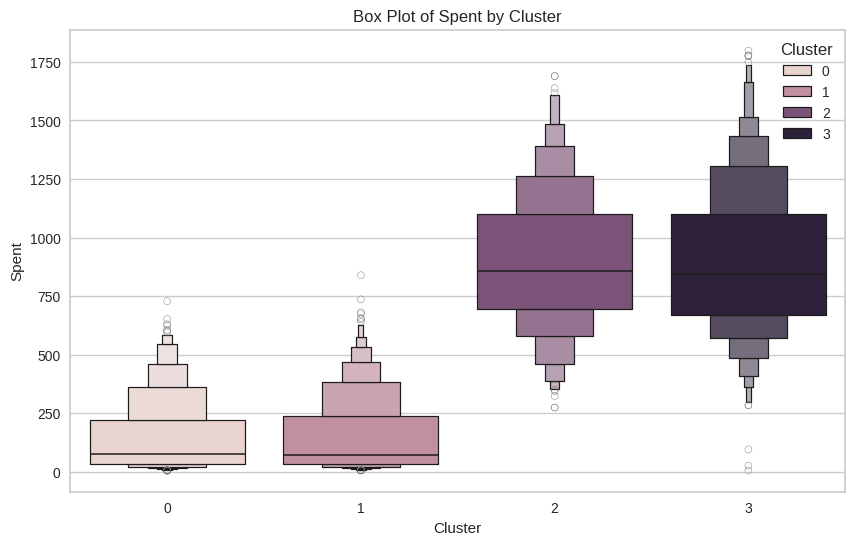

In [68]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster', y='Spent', data=df_new, hue='Cluster')
plt.title('Box Plot of Spent by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()

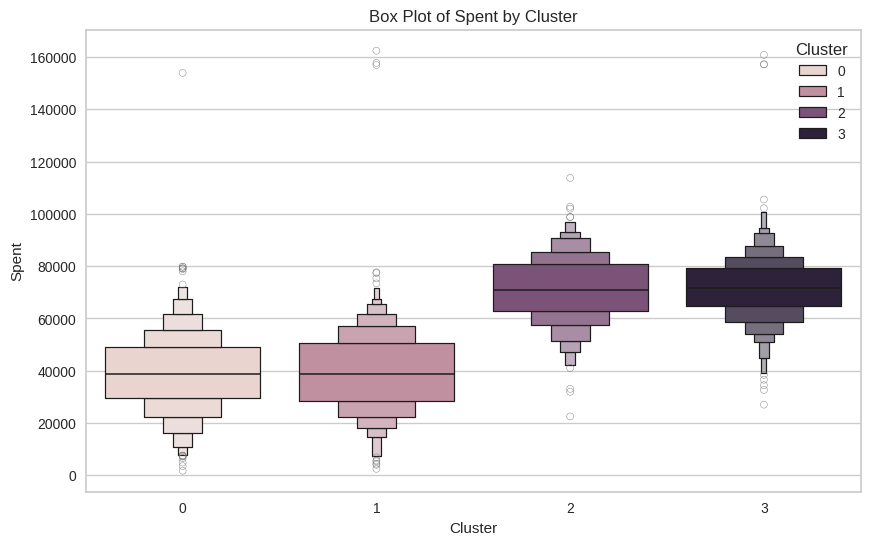

In [69]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Cluster', y='Income', data=df_new, hue='Cluster')
plt.title('Box Plot of Spent by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spent')
plt.show()

Insight:
1. Cluster 0 adalah customer dengan Income dan Total Spent rendah
2. Cluster 1 adalah customer dengan Income dan Total Spent menengah
3. Cluster 2 adalah customer dengan Income Tinggi dan Spent Tinggi
4. Cluster 3 adalah customer dengan Income Tinggi dan Spent Tinggi dan tersebar dalam rentang Income kecil

**C. Visualisasi total anak yang dimiliki tiap cluster**

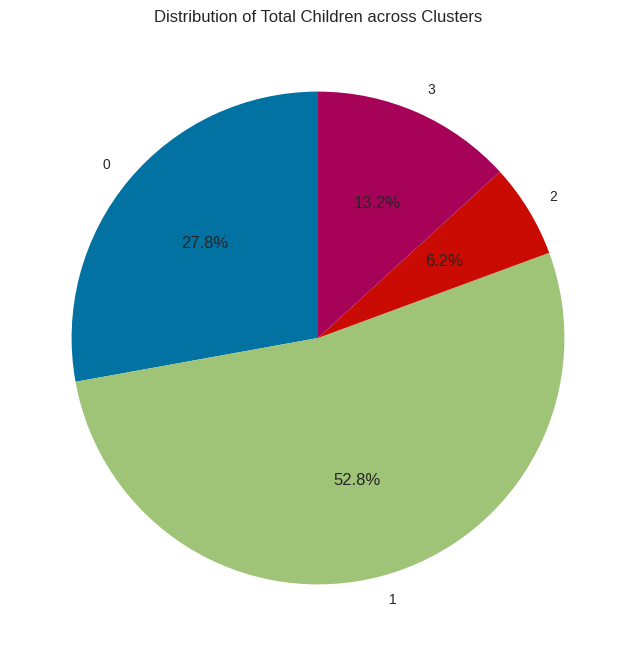

In [70]:
children_per_cluster = df_new.groupby('Cluster')['Children'].sum()

plt.figure(figsize=(8, 8))
plt.pie(children_per_cluster, labels=children_per_cluster.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Children across Clusters')
plt.show()

Insight:

Customer dengan jumlah anak terbanyak hingga terkecil secara berturut-turut, adalah

- 1 = 52,8%
- 0 = 27,8%
- 3 = 13,2%
- 2 = 6,2%


**D. Visualisasi Hasil Cluster pada status Education Customer**

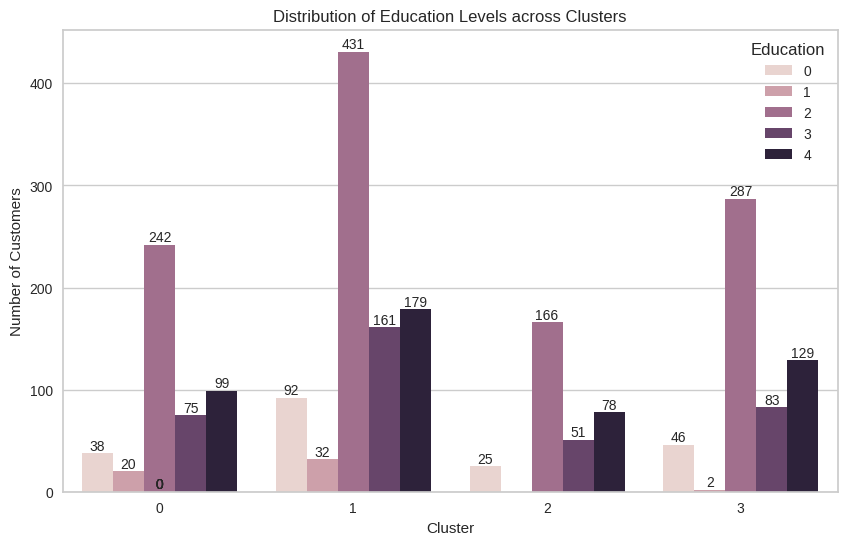

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Education', data=df_new)
plt.title('Distribution of Education Levels across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Add count labels above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.show()

***Mapping Education: Undergraduate, Phd, Master, Basic, 2n Cycle***

Insight:
1. Customer Cluster 0 dan 1 adalah customer dengan tingkat edukasi yang tinggi
2. Customer Cluster 2 dan 3 adalah customer dengan tingkat edukasi yang rendah

In [72]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


**E. Visualisasi Cluster pada behaviour Spent Customer**

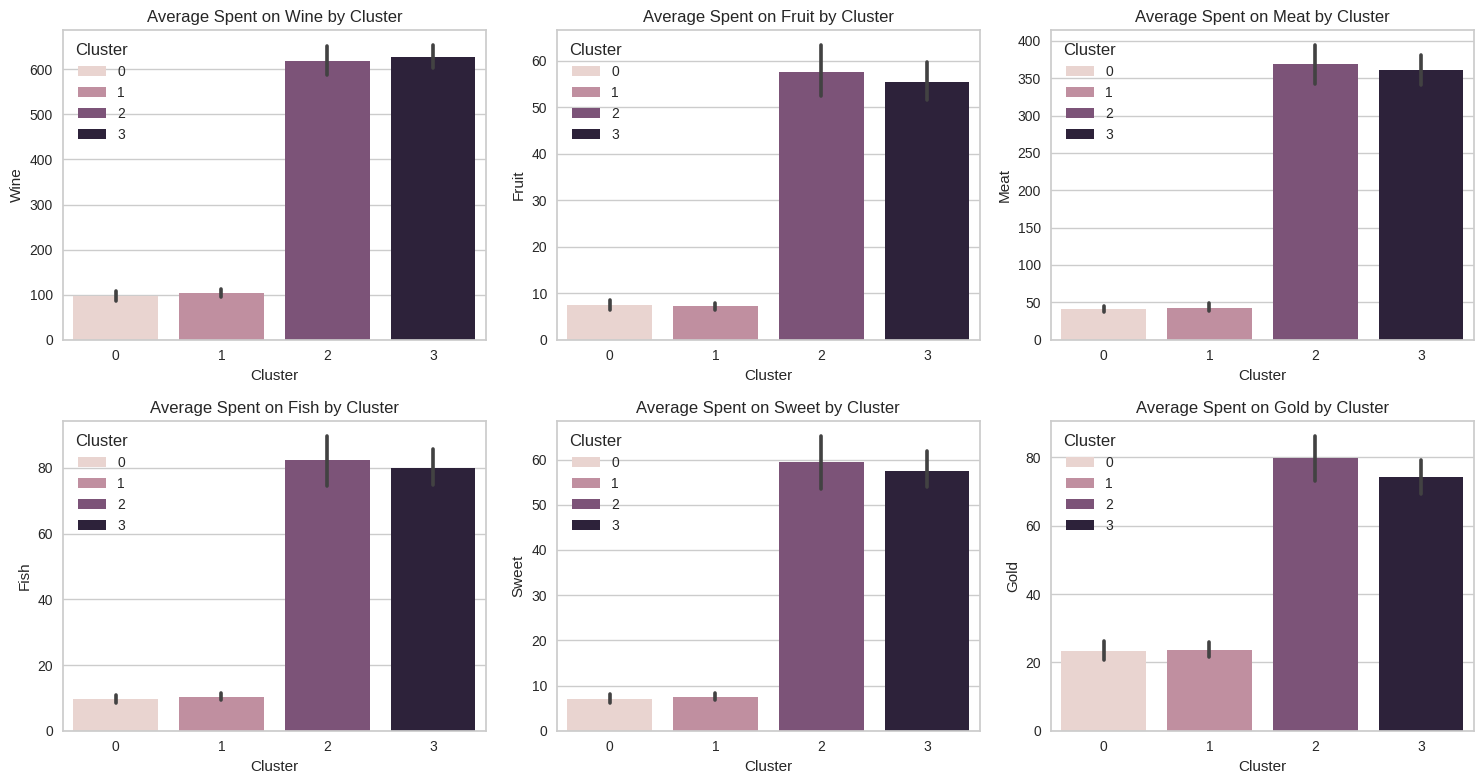

In [73]:
products = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']

plt.figure(figsize=(15, 8))

for i, product in enumerate(products):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='Cluster', y=product, data=df_new, estimator='mean', hue='Cluster')
    plt.title(f'Average Spent on {product} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{product}')

plt.tight_layout()
plt.show()

Insight:
1. Terlihat bahwa behaviour customer setiap cluster terdapat perbedaan yang mencolok, dimana cluster 0 dan 1 adalah customer yang tidak begitu konsumtif dan cluster 2 dan 3 adalah customer yang konsumtif.
2. Dari visualisasi ini dapat dilihat bahwa produk yang paling tinggi peminatnya ada pada produk Wine pada cluster customer 3 dan produk yang paling rendah peminatnya ada pada produk Sweet dan Fruit.
3. Cluster 0 terdiri dari customer yang memiliki minat sangat rendah terhadap setiap produk.
4. Cluster 1 terdiri dari customer yang menghabiskan uangnya lebih tinggi pada produk Wine.
5. Cluster 2 terdiri dari customer yang menghabiskan uangnya rata di setiap produk.
6. Cluster 3 terdiri dari customer yang menghabiskan uangnya rata di setiap produk namun rendah pada produk Fruit.

### **F. Visualisasi Customer yang hidup dengan keluarga atau partner**

Text(0, 0.5, 'Customers')

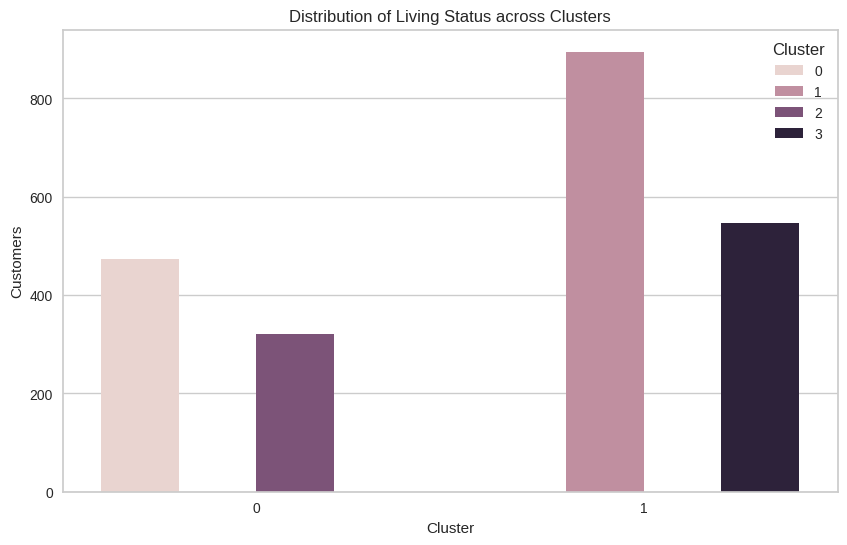

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Living_With', hue='Cluster', data=df_new)
plt.title('Distribution of Living Status across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Customers')

Insight:
1. Cluster 0 dan 2 merupakan customer yang tinggal sendiri (Alone: Divorced, Single, YOLO, Absurd, Widow)
2. Cluster 1 dan 3 merupakan customer yang tinggal bersama orang lain (Partner: Married, Together)

### **F. Visualisasi Cluster pada Setiap Campaign**

Text(0, 0.5, 'Number of Customers')

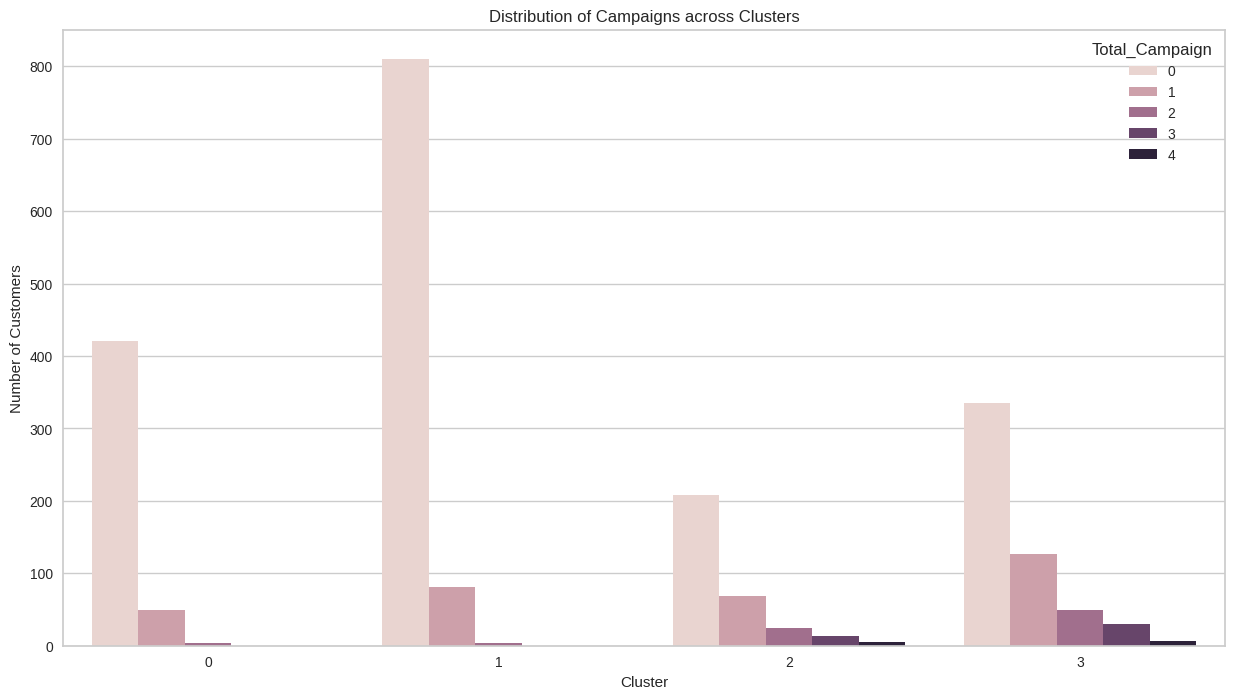

In [75]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Cluster', hue='Total_Campaign', data=df_new)
plt.title('Distribution of Campaigns across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

Insight:
1. Cluster 0 dan 1 merupakan customer yang kurang terpapar campaign
2. Cluster 2 dan 3 merupakan customer yang mendapatkan campaign dengan baik meskipun tidak dalam jumlah yang banyak.
3. Secara general response positif customer terhadap campaign tidak begitu baik.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [76]:
df_new

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,Age,Spent,Living_With,Children,Total_Purchases,Total_Campaign,Cluster
0,2,4,58138.0,58,635,88,546,172,88,88,67,1071,0,0,25,0,2
1,2,4,46344.0,38,11,1,6,2,1,6,70,21,0,2,6,0,0
2,2,5,71613.0,26,426,49,127,111,21,42,59,649,1,0,21,0,3
3,2,5,26646.0,26,11,4,20,10,3,5,40,33,1,1,8,0,1
4,4,3,58293.0,94,173,43,118,46,27,15,43,304,1,1,19,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,46,709,43,182,42,118,247,57,1159,1,1,18,0,3
2236,4,5,64014.0,56,406,0,30,0,0,8,78,414,1,3,22,1,1
2237,2,2,56981.0,91,908,48,217,32,12,24,43,1024,0,0,19,1,2
2238,3,5,69245.0,8,428,30,214,80,30,61,68,629,1,1,23,0,3


In [77]:
#Type your code here
group_cluster = df_new.groupby('Cluster').agg({
    'Income': ['mean'],
    'Spent': ['mean'],
    'Age': ['min', 'max'],
    'Education': ['mean'],
    'Marital_Status': ['mean'],
    'Living_With': ['mean'],
    'Children': ['mean'],
    'Total_Purchases': ['mean'],
    'Total_Campaign': ['sum'],
    'Wine': ['mean'],
    'Fruit': ['mean'],
    'Meat': ['mean'],
    'Fish': ['mean'],
    'Sweet': ['mean'],
    'Gold': ['mean'],
}).sort_values(by=('Cluster'), ascending=True)
group_cluster.style.background_gradient(cmap='Greys')

Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - Customer dengan Income dan Spent rendah
  - Umur 29-84 tahun
  - High Education
  - Minat terhadap keenam produk rendah
  - Status hidup: Alone/hidup sendiri
  - Kelima Campaign tidak pernah diperhatikan


2. Cluster 1:
  - Customer dengan Income dan Spent rendah
  - Umur 28-78 tahun
  - High Education
  - Minat terhadap produk Wine lebih tinggi daripada produk lain
  - Status hidup: Partner/bersama keluarga
  - Kelima Campaign tidak diterima dengan baik


3. Cluster 2:
  - Customer dengan Income dan Spent tinggi
  - Umur 29-81 tahun
  - Low Education
  - Minat terhadap keenam produk sama rata
  - Status hidup: Alone/hidup sendiri
  - Kelima Campaign diterima dengan baik


4. Cluster 3:
  - Customer dengan Income dan Spent tinggi
  - Umur 30-83 tahun
  - Low Education
  - Minat terhadap produk Fruit rendah
  - Status hidup: Partner/bersama keluarga
  - Kelima Campaign diterima dengan sangat baik

**Kesimpulan:**
1. Cluster yang diperoleh tidak memiliki karakteristik yang signifikan. Namun jika dapat diberi nama keempat cluster memiliki nama secara berurutan sebagai berikut...

- Cluster 0 = 'Silent Strivers'
- Cluster 1 = 'Wine Enthusiast'
- Cluster 2 = 'Universal High Spenders'
- Cluster 3 = 'Selective Big Spenders'  

2. Jika melihat keberhasilan promosi yang dilakukan maka sebenarnya customer Silent Strivers dan Wine Enthusiast menjadi perhatian bagi Marketing Manager agar dapat menjangkau minat mereka terhadap produk-produk lainnya.

📈📊📝

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [78]:
df_new.to_csv('/content/drive/MyDrive/Dicoding_DataScience/Submission_ML/Clustered.csv', index=False)